# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Top 3 Observations:
1. The Latitude vs. Temperature plot did not behave in the way that I expected, as you move north of the equator from latitude of 0 to 40 there is actually a linear decrease in temperature from 35 degrees F to -60 degrees F from 20 degrees latitude to around 80 degrees latitude.

2.  Wind speed, humidity and cloudiness show very little to no correlation to latitude.
3. In the Northern Hemisphere the linear regression has and r-squared value of -0.87, indicating there is a strong negative linear relationship between decreasing latitude and decreasing temperature in the Northern Hemisphere. This is not the case in the Southern Hemisphere.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold the requested data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : namibe
Processing Record 2 of Set 1 : tual
City not found. Skipping...
Processing Record 3 of Set 1 : margate
Processing Record 4 of Set 1 : puerto ayora
Processing Record 5 of Set 1 : nsanje
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : carnarvon
Processing Record 9 of Set 1 : klaksvik
Processing Record 10 of Set 1 : mahebourg
Processing Record 11 of Set 1 : sangar
Processing Record 12 of Set 1 : kapaa
Processing Record 13 of Set 1 : bethel
City not found. Skipping...
Processing Record 14 of Set 1 : busselton
City not found. Skipping...
Processing Record 15 of Set 1 : sfantu gheorghe
Processing Record 16 of Set 1 : mahibadhoo
Processing Record 17 of Set 1 : sovetskiy
Processing Record 18 of Set 1 : jamestown
Processing Record 19 of Set 1 : necochea
Processing Record 20 of Set 1 : sitka
Processing Record 21 of Set 1 : ushuaia
Process

Processing Record 35 of Set 4 : beloha
Processing Record 36 of Set 4 : bafoulabe
Processing Record 37 of Set 4 : narsaq
City not found. Skipping...
Processing Record 38 of Set 4 : longyearbyen
Processing Record 39 of Set 4 : touros
Processing Record 40 of Set 4 : eureka
Processing Record 41 of Set 4 : bairiki
Processing Record 42 of Set 4 : north bend
Processing Record 43 of Set 4 : saint-francois
Processing Record 44 of Set 4 : port blair
City not found. Skipping...
Processing Record 45 of Set 4 : horsham
Processing Record 46 of Set 4 : clifton
Processing Record 47 of Set 4 : uzhur
Processing Record 48 of Set 4 : college
Processing Record 49 of Set 4 : kropotkin
Processing Record 50 of Set 4 : nhulunbuy
Processing Record 0 of Set 5 : nome
City not found. Skipping...
Processing Record 1 of Set 5 : namatanai
Processing Record 2 of Set 5 : sakakah
Processing Record 3 of Set 5 : kang
Processing Record 4 of Set 5 : ola
Processing Record 5 of Set 5 : yellowknife
Processing Record 6 of Set 5

Processing Record 24 of Set 8 : dwarka
Processing Record 25 of Set 8 : havelock
Processing Record 26 of Set 8 : pangody
Processing Record 27 of Set 8 : reconquista
Processing Record 28 of Set 8 : boden
Processing Record 29 of Set 8 : balykshi
Processing Record 30 of Set 8 : valparaiso
Processing Record 31 of Set 8 : parainen
Processing Record 32 of Set 8 : vostok
Processing Record 33 of Set 8 : murindo
Processing Record 34 of Set 8 : husavik
Processing Record 35 of Set 8 : palmer
Processing Record 36 of Set 8 : marawi
Processing Record 37 of Set 8 : mineros
Processing Record 38 of Set 8 : penzance
Processing Record 39 of Set 8 : olafsvik
Processing Record 40 of Set 8 : kamenka
Processing Record 41 of Set 8 : saint-denis
Processing Record 42 of Set 8 : acapulco
City not found. Skipping...
Processing Record 43 of Set 8 : luxor
Processing Record 44 of Set 8 : komsomolskiy
Processing Record 45 of Set 8 : the pas
Processing Record 46 of Set 8 : svetlaya
Processing Record 47 of Set 8 : ilins

Processing Record 8 of Set 12 : naze
Processing Record 9 of Set 12 : hornepayne
Processing Record 10 of Set 12 : bonwapitse
Processing Record 11 of Set 12 : sabang
Processing Record 12 of Set 12 : berdigestyakh
Processing Record 13 of Set 12 : los llanos de aridane
City not found. Skipping...
Processing Record 14 of Set 12 : carauari
Processing Record 15 of Set 12 : verkhnyaya inta
Processing Record 16 of Set 12 : edgewater
Processing Record 17 of Set 12 : oparino
Processing Record 18 of Set 12 : nuevo casas grandes
Processing Record 19 of Set 12 : oga
Processing Record 20 of Set 12 : lander
Processing Record 21 of Set 12 : nouadhibou
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 12 : yajalon
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
weather_data = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [5]:
# Create a weather dictionary
weather_data.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [6]:
# Display the Weather Data Frame
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mossamedes,40,AO,1608171064,84,-15.20,12.15,18.39,1.67
1,Tual,66,ID,1608171064,75,-5.67,132.75,29.55,8.15
2,Margate,100,GB,1608171064,86,51.38,1.39,9.44,0.89
3,Puerto Ayora,19,EC,1608171064,92,-0.74,-90.35,22.22,0.45
4,Nsanje,100,MW,1608171064,93,-16.92,35.26,23.13,0.65
...,...,...,...,...,...,...,...,...,...
578,Nuevo Casas Grandes,0,MX,1608171147,36,30.42,-107.92,3.33,1.34
579,Oga,28,IT,1608171148,92,46.46,10.35,5.56,1.50
580,Lander,1,US,1608170856,82,42.83,-108.73,0.00,2.14
581,Nouadhibou,0,MR,1608171148,77,20.93,-17.03,18.00,10.80


In [7]:
# Save city data into a csv file
weather_data.to_csv("output_data/cities.csv", index = False)

In [8]:
#Create Statistics table

weather_data.agg({'Lat':['count', 'mean', 'std', 'min','max'],
                'Lng':['count', 'mean', 'std', 'min', 'max'],
                 'Max Temp':['count', 'mean', 'std', 'min', 'max'],
                 'Humidity':['count', 'mean', 'std', 'min','max'],
                 'Cloudiness':['count', 'mean', 'std', 'min','max'],
                 'Wind Speed':['count', 'mean', 'std', 'min','max'],
                 'Date':['count', 'mean', 'std', 'min','max'],})




,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,19.703808,14.724322,9.894168,76.574614,57.156089,3.643979,1.608171e+09
std,33.678315,92.764112,16.662311,17.544078,40.598546,2.762150,6.803145e+01
min,-54.800000,-179.170000,-42.090000,1.000000,0.000000,0.240000,1.608171e+09
max,78.220000,179.320000,38.330000,100.000000,100.000000,18.000000,1.608171e+09


In [10]:
#need to find out how to get it to the percentages in aggregate statements.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#There are no cities over 100% humidity

weather_data.agg({'Lat':['count', 'mean', 'std', 'min','max'],
                'Lng':['count', 'mean', 'std', 'min', 'max'],
                 'Max Temp':['count', 'mean', 'std', 'min', 'max'],
                 'Humidity':['count', 'mean', 'std', 'min','max'],
                 'Cloudiness':['count', 'mean', 'std', 'min','max'],
                 'Wind Speed':['count', 'mean', 'std', 'min','max'],
                 'Date':['count', 'mean', 'std', 'min','max'],})

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,19.703808,14.724322,9.894168,76.574614,57.156089,3.643979,1.608171e+09
std,33.678315,92.764112,16.662311,17.544078,40.598546,2.762150,6.803145e+01
min,-54.800000,-179.170000,-42.090000,1.000000,0.000000,0.240000,1.608171e+09
max,78.220000,179.320000,38.330000,100.000000,100.000000,18.000000,1.608171e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
#Max humidity is at 100%, nothing is over the 100% humidity

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Not applicable

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

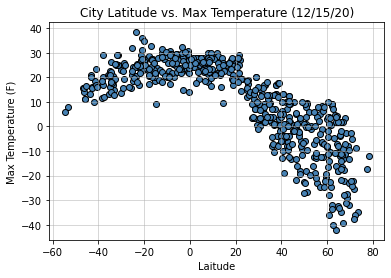

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("images/City Latitude vs Max Temperature.png")

Observation - The Latitude vs. Max Temperature plot is interesting. As you move north of the equator from a 
latitude of 0 to a latitude of 40 you see what appears to be a linear decrease in temperature from 35 degrees to 
-60 degrees from 20 degrees latitude to around 80 degrees latitude.


## Latitude vs. Humidity Plot

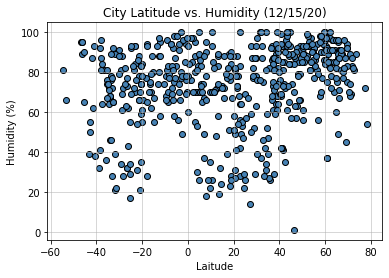

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

Observation - The Latitude vs. Humidity plot does not seem to have a strong correlation to latitude. 
It appears more cities have a humidity above 60% than a humidity below 60%. 


## Latitude vs. Cloudiness Plot

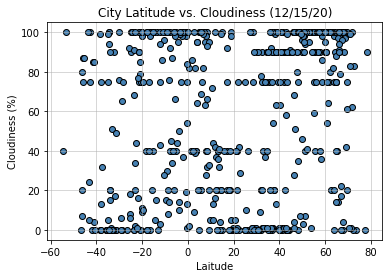

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

The Latitude vs. Cloudiness plot does not seem to have any correlation to latitude. Most areas are concentrated either at 100% or at 0%.

## Latitude vs. Wind Speed Plot

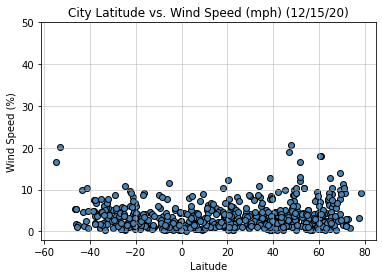

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

The Latitude vs. Wind Speed scatterplot suggests there is no correlation between Wind Speed and Latitude. The majority of the wind speed is between 0 and 10%.  

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [17]:
# Define function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


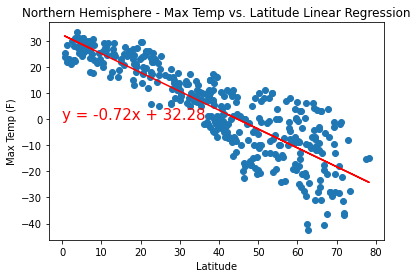

In [18]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In the Northern Hemisphere the linear regression has and r-squared value of -0.87, indicating there is a strong negative linear relationship between decreasing latitude and decreasing temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.52


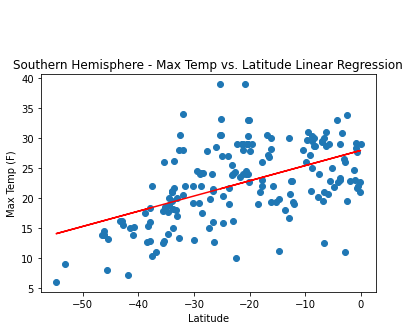

In [19]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In the Southern Hemisphere there is a weaker relationship between temperature and latitude especially when compared to the Northern Hemisphere, with an r-squared value of 0.52. This means the linear curve fit can only account for 52% of the variance seen in the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


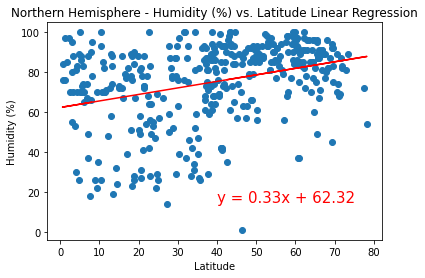

In [20]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There ia a very weak relationship between latitude and humidity in the Northern Hemisphere with an r-squared value of 0.33. This means the linear curve fit can only account for 33% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation of the line y = 0.33x + 62.32. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.21


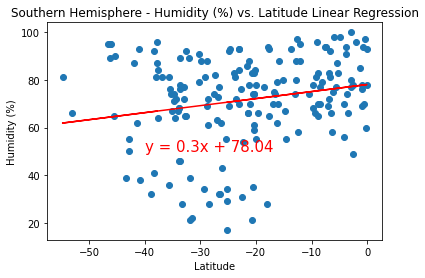

In [21]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There ia a very weak relationship between latitude and humidity in the Southern Hemisphere with an r-squared value of 0.21. This means the linear curve fit can only account for 21% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation of the line y = 0.3x + 78.04. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.27


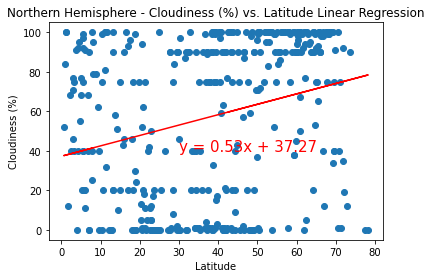

In [23]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There ia a very weak relationship between latitude and cloudiness in the Northern Hemisphere with an r-squared value of 0.27. This means the linear curve fit can only account for 27% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation of the line y = 0.53x + 37.27. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.25


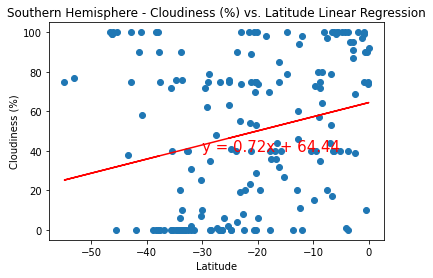

In [24]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There ia a very weak relationship between latitude and cloudiness in the Southern Hemisphere with an r-squared value of 0.25. This means the linear curve fit can only account for 25% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation of the line y = 0.72x + 64.44. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.2


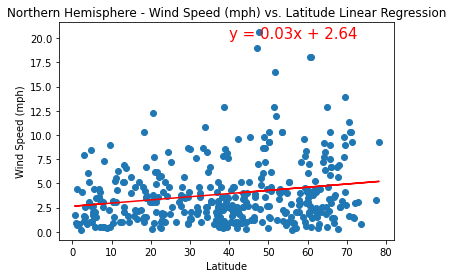

In [25]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There ia a very weak relationship between latitude and wind speed in the Northern Hemisphere with an r-squared value of 0.2. This means the linear curve fit can only account for 20% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation of the line y = 0.03x + 2.64. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.32


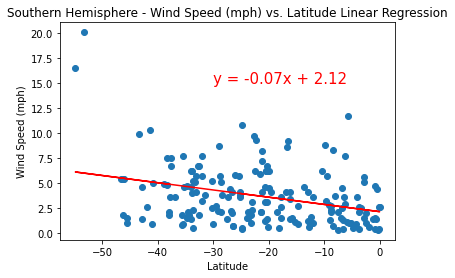

In [26]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There ia a very weak relationship between latitude and wind speed in the Southern Hemisphere with an r-squared value of -0.32. This means the linear curve fit can only account for -32% of the variance seen in the data.